In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# read Iris data set

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),10):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [5.1 3.5 1.4 0.2 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
30 [4.8 3.1 1.6 0.2 'Iris-setosa']
40 [5.0 3.5 1.3 0.3 'Iris-setosa']
50 [7.0 3.2 4.7 1.4 'Iris-versicolor']
60 [5.0 2.0 3.5 1.0 'Iris-versicolor']
70 [5.9 3.2 4.8 1.8 'Iris-versicolor']
80 [5.5 2.4 3.8 1.1 'Iris-versicolor']
90 [5.5 2.6 4.4 1.2 'Iris-versicolor']
100 [6.3 3.3 6.0 2.5 'Iris-virginica']
110 [6.5 3.2 5.1 2.0 'Iris-virginica']
120 [6.9 3.2 5.7 2.3 'Iris-virginica']
130 [7.4 2.8 6.1 1.9 'Iris-virginica']
140 [6.7 3.1 5.6 2.4 'Iris-virginica']


In [3]:
# get Iris classifications

IC = np.unique(IA[:,4])
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [5]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


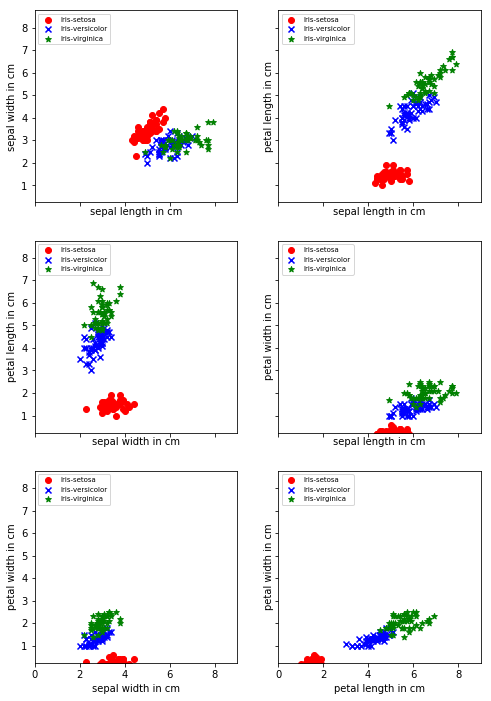

In [6]:
# plot classifications of all pairs of features 

plt.close('all')
fig, ax = plt.subplots(nrows=3, ncols=2, figsize= (8,12), sharex=True, sharey=True)


i = 0
k = 0
k1 = 0
k2 = 0
while i < 4:
    yF = IrisF[i]
    j = 0
    while j < i:
        k1 = np.int(k/2)
        k2 = np.mod(k,2)
        xF = IrisF[j]
        
        ax[k1,k2].scatter(x=IA[Cl == IC[0], j], y=IA[Cl == IC[0], i], color=pltC[0], 
                          marker=pltM[0], label=IC[0])
        ax[k1,k2].scatter(x=IA[Cl == IC[1], j], y=IA[Cl == IC[1], i], color=pltC[1], 
                          marker=pltM[1], label=IC[1])
        ax[k1,k2].scatter(x=IA[Cl == IC[2], j], y=IA[Cl == IC[2], i], color=pltC[2], 
                          marker=pltM[2], label=IC[2])
        ax[k1,k2].set(aspect='equal')
        ax[k1,k2].set_xlim([0,9])
        ax[k1,k2].set_ylim([0,9])
        ax[k1,k2].set_xlabel(xF)
        ax[k1,k2].set_ylabel(yF)
        ax[k1,k2].legend(loc='upper left', fontsize='x-small')
        j += 1
        k += 1
    i += 1
plt.show()    

# -------------------------------Assignment for Week 7----------------------------------
## -------------------------------------------Pooneet Thaper-------------------------------------------

In [7]:
# Pooneet Thaper
# Professor Grimmelmann
# CSC 59929

# Assignment for Week 5:

# Iris Classification using all features and classes

# Classification on set of all classe
#     0: setosa 
#     1: versicolor 
#     2: virginica

cdx = np.array([0, 1, 2])
    
# Features:
    # 0: sepal length in cm
    # 1: sepal width in cm
    # 2: petal length in cm
    # 3: petal width in cm

# Case:
    # All Four Features with Gini Impurity
    # All Four Features with Entropy

# Format:
#   1. Get features and classes for all samples
#   2. Visualize features and normalized features
#   3. Train decision tree classifier with depths from 1 to 10 each with Gini Impurity and Entropy
#   4. Visualize error vs depth for each type of impurity
#   5. Summarize results in a table
#   6. Visualize decision tree for each impurity

# List to keep records on performance of each system
Records = []
case_num = 0

In [8]:
# Helper functions declared before cases and generalized for arbitrary number of features

def get_class_labels_and_features():
    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        if Cl[i] == IC[cdx[2]]:
            numCl += 1 
        i += 1  
        
    NC = np.zeros((numCl, len(cdx)))
    NF = np.zeros((numCl, len(fdx)))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = [1,0,0]
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = [0,1,0]
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        if Cl[i] == IC[cdx[2]]:      
            NC[j] = [0,0,1]
            for k in range(len(fdx)):
                NF[j,k] = IA[i,fdx[k]]
            j += 1
        i += 1
        
    NC_Class = np.nonzero(NC)[1]
    return (NC, NF, NC_Class)

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01, is_sub_plot=False, plot=plt, selected=[0,1], positive_color='red'):
    X = np.vstack((X[:,selected[0]], X[:,selected[1]])).T
    # setup marker generator and color map
    colors = ('grey', positive_color)
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plot.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    if (is_sub_plot):
        plot.set_xlim(xx1.min(), xx1.max())
        plot.set_ylim(xx2.min(), xx2.max())
    else:
        plot.xlim(xx1.min(), xx1.max())
        plot.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plot.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])
    if (is_sub_plot):
        plot.set_title('Logistic Regression', fontsize='medium')
        plot.set_xlabel('{} [standardized]'.format(IrisF[fdx[0]]))
        plot.set_ylabel('{} [standardized]'.format(IrisF[fdx[1]]))
    else:
        plot.title('Logistic Regression', fontsize='medium')
        plot.xlabel('{} [standardized]'.format(IrisF[fdx[0]]))
        plot.ylabel('{} [standardized]'.format(IrisF[fdx[1]]))
    plot.legend(loc='upper left', fontsize='small')
        

def standardize_features(NF):
    NF_Std = np.copy(NF)
    for i in range(len(fdx)):
        NF_Std[:,i] = (NF[:,i] - NF[:,i].mean()) / NF[:,i].std()
    return NF_Std

def plot_features(sub_plot, NF, NC, title, selected=[0,1]):
    NF = np.vstack((NF[:,selected[0]], NF[:,selected[1]])).T
    sub_plot.scatter(x = NF[NC == 0, 0], y = NF[NC == 0, 1], color=pltC[cdx[0]], 
                marker=pltM[cdx[0]], label=IC[cdx[0]])
    sub_plot.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[1]], 
                marker=pltM[cdx[1]], label=IC[cdx[1]])
    sub_plot.scatter(x = NF[NC == 2, 0], y = NF[NC == 2, 1], color=pltC[cdx[2]], 
                marker=pltM[cdx[2]], label=IC[cdx[2]])
    sub_plot.set_xlabel(IrisF[fdx[selected[0]]])
    sub_plot.set_ylabel(IrisF[fdx[selected[1]]])
    sub_plot.legend(loc='lower right')
    sub_plot.set_title(title)

def plot_raw_standardized():
    f = []
    i = 0;
    j = 1;
    while j<len(fdx):
        f.append([i,j])
        j+=1
        if (j==len(fdx)):
            i+=1
            j = i+1

    fig, ax = plt.subplots(nrows=len(f), ncols=2, figsize = (12,4*len(f)))
    fig.subplots_adjust(hspace=.4)

    for i in range(len(f)):
        plot_features(ax[i, 0], NF, NC_Class, 'Raw feature values', f[i])
        plot_features(ax[i, 1], NF_Std, NC_Class, 'Normalized feature values', f[i])



## -------------------------------------------Four Feature Case-------------------------------------------

In [9]:
# Four Feature Cases:
# sepal length (0), sepal width (1), petal length (2) and petal width (3)
fdx = np.array([0,1,2,3])
# Get Class Labels and Selected Features for each sample
NC, NF, NC_Class = get_class_labels_and_features()

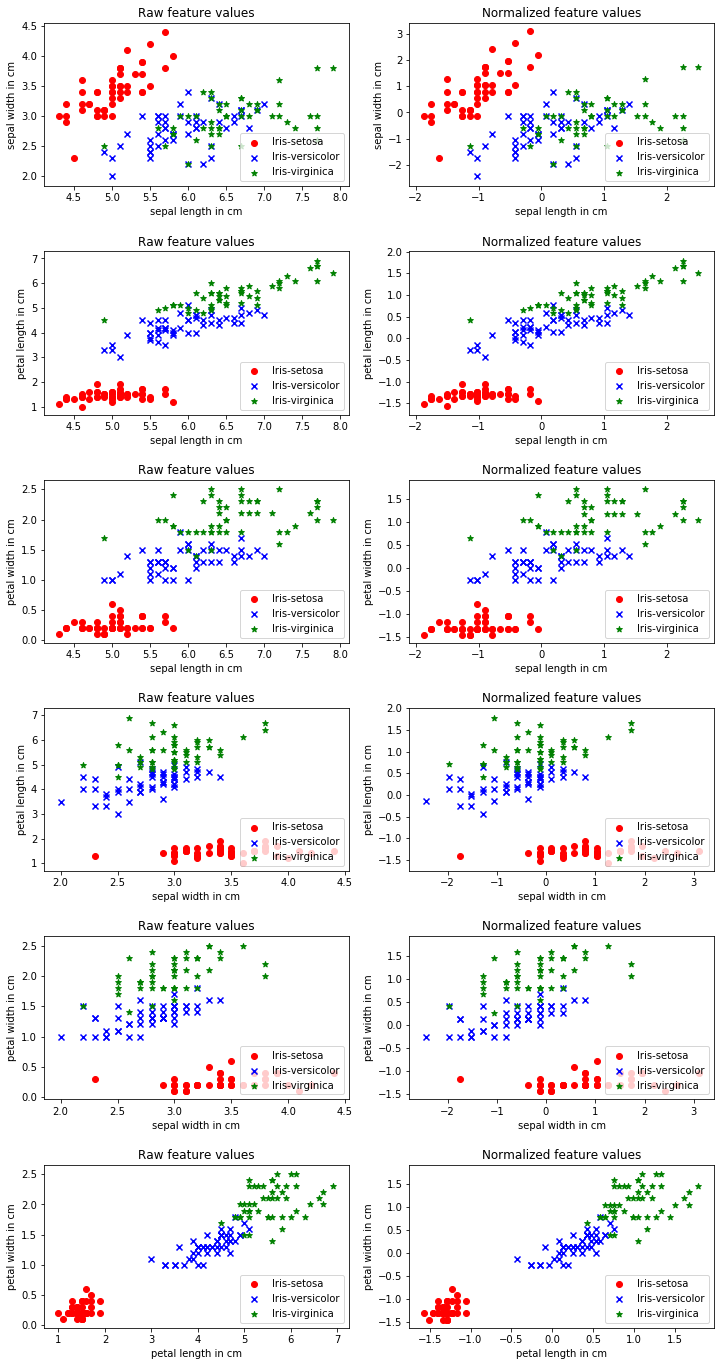

In [10]:
# Standardize Inputs

NF_Std = standardize_features(NF)

plt.close('all')
plot_raw_standardized()

plt.show()

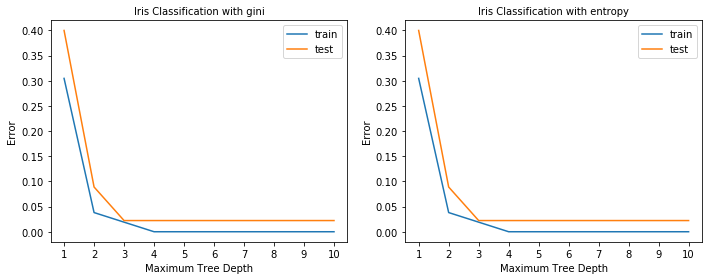

In [11]:
from matplotlib.ticker import MaxNLocator 
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))

NF_train, NF_test, NC_train, NC_test = train_test_split(
         NF, NC_Class, test_size=0.3, random_state=0)

MaxDepth = 10
Impurity_type = ['gini', 'entropy']

for i, impurity in enumerate(Impurity_type):

    Errors = np.zeros((MaxDepth,2))
    for j in range(0,MaxDepth):
        tree = DecisionTreeClassifier(criterion=impurity, max_depth=j+1)
        tree.fit(NF_train, NC_train)

        NF_combined = np.vstack((NF_train, NF_test))
        NC_combined = np.hstack((NC_train, NC_test))

        # optional outputs
        z = tree.apply(NF_combined)
        #print(z)
        dp = tree.decision_path(NF_combined)
        #print (dp)

        Errors[j,0] = 1 - tree.score(NF_train,NC_train)
        Errors[j,1] = 1 - tree.score(NF_test,NC_test)
        
        export_graphviz(tree, out_file='T_Iris_{}.dot'.format(impurity), feature_names=IrisF, filled=True, rounded=True)
        Records.append((case_num, j+1, impurity, Errors[j,0], Errors[j,1]))
        case_num += 1
        
    ax[i].set_xlabel('Maximum Tree Depth')
    ax[i].set_ylabel('Error')
    ax[i].set_title('Iris Classification with {}'.format(impurity), fontsize ='medium')
    ax[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[i].plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
    ax[i].plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
    ax[i].legend(loc='upper right', fontsize='medium')
    
fig.tight_layout()
plt.show()

## --------------------------------------------Summary-----------------------------------------------------

In [12]:
from prettytable import PrettyTable
t = PrettyTable(['Case Num', 'Depth', 'Impurity', 'Train Error', 'Test Error'])
for record in Records:
    t.add_row(record)
print(t)

+----------+-------+----------+-----------------+-----------------+
| Case Num | Depth | Impurity |   Train Error   |    Test Error   |
+----------+-------+----------+-----------------+-----------------+
|    0     |   1   |   gini   |  0.304761904762 |       0.4       |
|    1     |   2   |   gini   | 0.0380952380952 | 0.0888888888889 |
|    2     |   3   |   gini   | 0.0190476190476 | 0.0222222222222 |
|    3     |   4   |   gini   |       0.0       | 0.0222222222222 |
|    4     |   5   |   gini   |       0.0       | 0.0222222222222 |
|    5     |   6   |   gini   |       0.0       | 0.0222222222222 |
|    6     |   7   |   gini   |       0.0       | 0.0222222222222 |
|    7     |   8   |   gini   |       0.0       | 0.0222222222222 |
|    8     |   9   |   gini   |       0.0       | 0.0222222222222 |
|    9     |   10  |   gini   |       0.0       | 0.0222222222222 |
|    10    |   1   | entropy  |  0.304761904762 |       0.4       |
|    11    |   2   | entropy  | 0.0380952380952 

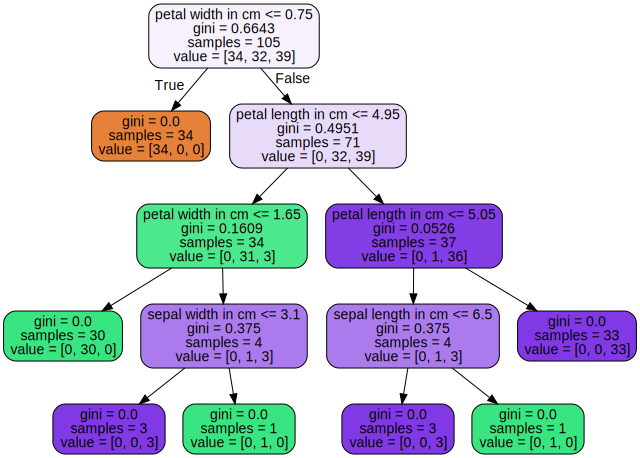

In [13]:
with open('T_Iris_gini.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

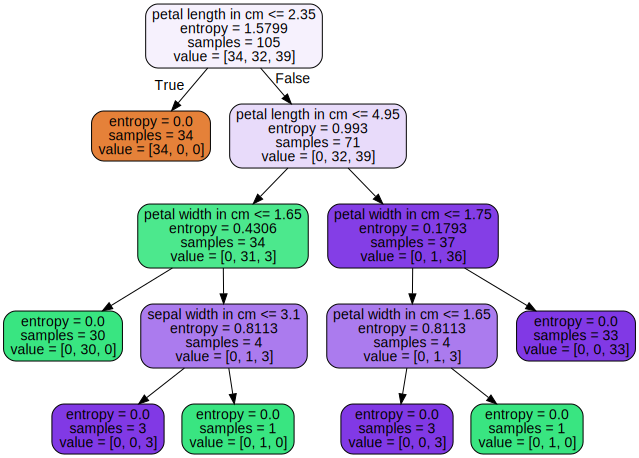

In [14]:
with open('T_Iris_entropy.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [15]:
# Discussion:
#     The decision tree classifiers were explored using the available criterion in the Scikit-Learn implementation. The
# two criterion, Gini impurity and Entropy, performed identically in each run of the program, resulting in the same 
# tree. I am not sure why this is other than that they both happen to be optimized identically at each node. Another 
# interesting trend is that the decision tree starts off having a high error rate at depth one and increases quite 
# quickly until the tree seems to be optimized.